In [2]:
import qtm.fubini_study
import qtm.ansatz
import qtm.constant
import qtm.base
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../')


In [3]:
# Init parameters
num_qubits = 3
# For arbitrary initial state
num_layers = 1
thetas_origin = np.ones((num_qubits*num_layers*5))
theta = np.random.uniform(0, 2*np.pi)


In [5]:
# GHZ
thetas = thetas_origin.copy()
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)

loss_values_ghz = []
thetass_ghz = []
for i in range(0, 100):
    G = qtm.fubini_study.calculate_linear_state(qc.copy(), thetas, num_layers)
    grad_loss = qtm.base.grad_loss(
        qc,
        qtm.ansatz.create_GHZchecker_linear,
        thetas, r=1/2, s=np.pi/2, num_layers=num_layers, theta=theta)
    thetas = np.real(thetas - qtm.constant.learning_rate *
                     (np.linalg.inv(G) @ grad_loss))
    qc_copy = qtm.ansatz.create_GHZchecker_linear(
        qc.copy(), thetas, num_layers, theta)
    loss = qtm.loss.loss_basis(qtm.base.measure(
        qc_copy, list(range(qc_copy.num_qubits))))
    loss_values_ghz.append(loss)
    thetass_ghz.append(thetas)


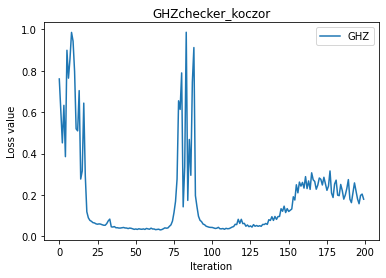

In [5]:

# Plot loss value in 100 steps
plt.plot(loss_values_ghz, label='GHZ', linestyle='-')
plt.title('GHZchecker_linear')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.savefig('GHZchecker_linear.png', format='png', dpi=600)
plt.show()


In [6]:
traces_ghz, fidelities_ghz = [], []
for thetas in thetass_ghz:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.ansatz.create_linear_state(qc, thetas, num_layers=num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.ansatz.create_ghz_state(num_qubits, theta=theta)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces_ghz.append(trace)
    fidelities_ghz.append(fidelity)


In [9]:
# W

thetas = thetas_origin.copy()
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)

loss_values_w = []
thetass_w = []
for i in range(0, 100):
    G = qtm.fubini_study.calculate_linear_state(qc.copy(), thetas, num_layers)
    grad_loss = qtm.base.grad_loss(
        qc,
        qtm.ansatz.create_Wchecker_linear,
        thetas, r=1/2, s=np.pi/2, num_layers=num_layers)
    thetas = np.real(thetas - qtm.constant.learning_rate *
                     (np.linalg.inv(G) @ grad_loss))
    qc_copy = qtm.ansatz.create_Wchecker_linear(qc.copy(), thetas, num_layers)
    loss = qtm.loss.loss_basis(qtm.base.measure(
        qc_copy, list(range(qc_copy.num_qubits))))
    loss_values_w.append(loss)
    thetass_w.append(thetas)


In [10]:
import qtm.custom_gate
traces_w, fidelities_w = [], []
for thetas in thetass_w:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.ansatz.create_linear_state(qc, thetas, num_layers=num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.ansatz.create_w_state_3qubit_inverse(qc1, theta).inverse()
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces_w.append(trace)
    fidelities_w.append(fidelity)


In [ ]:
# Haar
import qtm.encoding
thetas = thetas_origin.copy()
psi = 2*np.random.rand(2**num_qubits)-1
psi = psi / np.linalg.norm(psi)
encoder = qtm.encoding.Encoding(psi, 'amplitude_encoding')

loss_values_haar = []
thetass_haar = []
for i in range(0, 100):
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    G = qtm.fubini_study.calculate_linear_state(qc.copy(), thetas, num_layers)
    qc = encoder.qcircuit
    grad_loss = qtm.base.grad_loss(
        qc,
        qtm.ansatz.create_haarchecker_linear,
        thetas, r=1/2, s=np.pi/2, num_layers=num_layers, encoder=encoder)

    thetas = np.real(thetas - qtm.constant.learning_rate *
                     (np.linalg.inv(G) @ grad_loss))
    qc_copy = qtm.ansatz.create_haarchecker_linear(
        qc.copy(), thetas, num_layers, encoder)
    loss = qtm.loss.loss_basis(qtm.base.measure(
        qc_copy, list(range(qc_copy.num_qubits))))
    loss_values_haar.append(loss)
    thetass_haar.append(thetas)


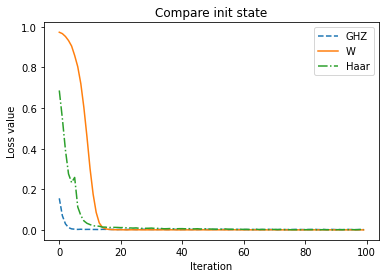

In [78]:

# Plot loss value in 100 steps
plt.plot(loss_values_ghz, label='GHZ', linestyle='--')
plt.plot(loss_values_w, label='W', linestyle='-')
plt.plot(loss_values_haar, label='Haar', linestyle='-.')
plt.title('Compare init state')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.savefig('Compare_init_state.png', format='png', dpi=600)
plt.show()


In [12]:
traces_haar, fidelities_haar = [], []
for thetas in thetass_haar:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.ansatz.create_linear_state(qc, thetas, num_layers=num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = encoder.qcircuit
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces_haar.append(trace)
    fidelities_haar.append(fidelity)


C:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


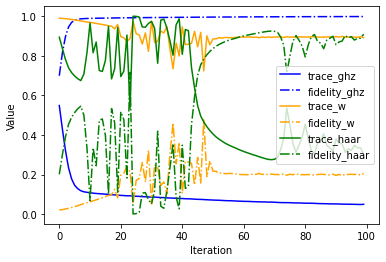

In [13]:
plt.plot(traces_ghz, label='trace_ghz', color='blue')
plt.plot(fidelities_ghz, label='fidelity_ghz', linestyle='-.', color='blue')
plt.plot(traces_w, label='trace_w', color='orange')
plt.plot(fidelities_w, label='fidelity_w', linestyle='-.', color='orange')
plt.plot(traces_haar, label='trace_haar', color='g')
plt.plot(fidelities_haar, label='fidelity_haar', linestyle='-.', color='g')
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()
plt.savefig('Compare_init_state_trace_fidelity.eps', format='eps', dpi=600)
plt.show()


C:\Users\haime\AppData\Local\Temp\ipykernel_7132\1448527667.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fidelities_ghz = fidelities_ghz.applymap(lambda s: np.complex(s.replace('i', 'j'))).values
C:\Users\haime\AppData\Local\Temp\ipykernel_7132\1448527667.py:6: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fidelit

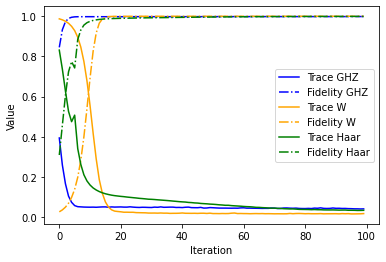

In [14]:
import pandas as pd
fidelities_ghz = pd.read_csv(
    "../../experiments/compare_initstate/fidelities_ghz.csv", sep=",", header=None)
fidelities_ghz = fidelities_ghz.applymap(
    lambda s: np.complex(s.replace('i', 'j'))).values

fidelities_w = pd.read_csv(
    "../../experiments/compare_initstate/fidelities_w.csv", sep=",", header=None)
fidelities_w = fidelities_w.applymap(
    lambda s: np.complex(s.replace('i', 'j'))).values

fidelities_haar = pd.read_csv(
    "../../experiments/compare_initstate/fidelities_haar.csv", sep=",", header=None)
fidelities_haar = fidelities_haar.applymap(
    lambda s: np.complex(s.replace('i', 'j'))).values

traces_ghz = pd.read_csv(
    "../../experiments/compare_initstate/traces_ghz.csv", sep=",", header=None)

traces_w = pd.read_csv(
    "../../experiments/compare_initstate/traces_w.csv", sep=",", header=None)

traces_haar = pd.read_csv(
    "../../experiments/compare_initstate/traces_haar.csv", sep=",", header=None)


plt.plot(traces_ghz, label='Trace GHZ', color='blue')
plt.plot(fidelities_ghz, label='Fidelity GHZ', linestyle='-.', color='blue')
plt.plot(traces_w, label='Trace W', color='orange')
plt.plot(fidelities_w, label='Fidelity W', linestyle='-.', color='orange')
plt.plot(traces_haar, label='Trace Haar', color='g')
plt.plot(fidelities_haar, label='Fidelity Haar', linestyle='-.', color='g')
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()
plt.savefig('Compare_init_state_trace_fidelity.eps', format='eps', dpi=600)
plt.show()
